In [1]:
# I load the needed libraries
library(dplyr)
library(scales)
library(GoFKernel)

library(mvtnorm)
library(gplots)

options(warn=-1)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




# Preparation of the simulation

I load the functions from the class file:


In [2]:
source("class_MCMC.R")

I define then the function that I want to use as output of the MCMCs:

In [3]:
# Function to sampled from: n-dim gaussian with chosen sigmas and centers
posterior_g_inhom = function (theta) {

    sigmas = c(1:length(theta))
    centers = c(seq(length(theta), 1))

    product = 1
    for (i in 1:length(theta)) {
        product = product * exp(-(theta[i] - centers[i])**2/sigmas[i]**2)
    }

    return (product)

}

chosen_function = posterior_g_inhom

Then I only have to determine the parameters for the initialization = the "hyperparameters" of the simulations

In [4]:
# The initial parameters are:
init = c(1, 1, 1)
std = diag(0.01, 3)

N = as.integer(1e5)
burn_in = as.integer(1e4)
# N = as.integer(1e4)
# burn_in = as.integer(1e3)

print_step = as.integer(1e2)
# print_init = as.integer(1e3)

N_tot = N + burn_in

# For Haario:
epsilon = 0.001


# Simulations

Acceptance rate =  94.15182 %


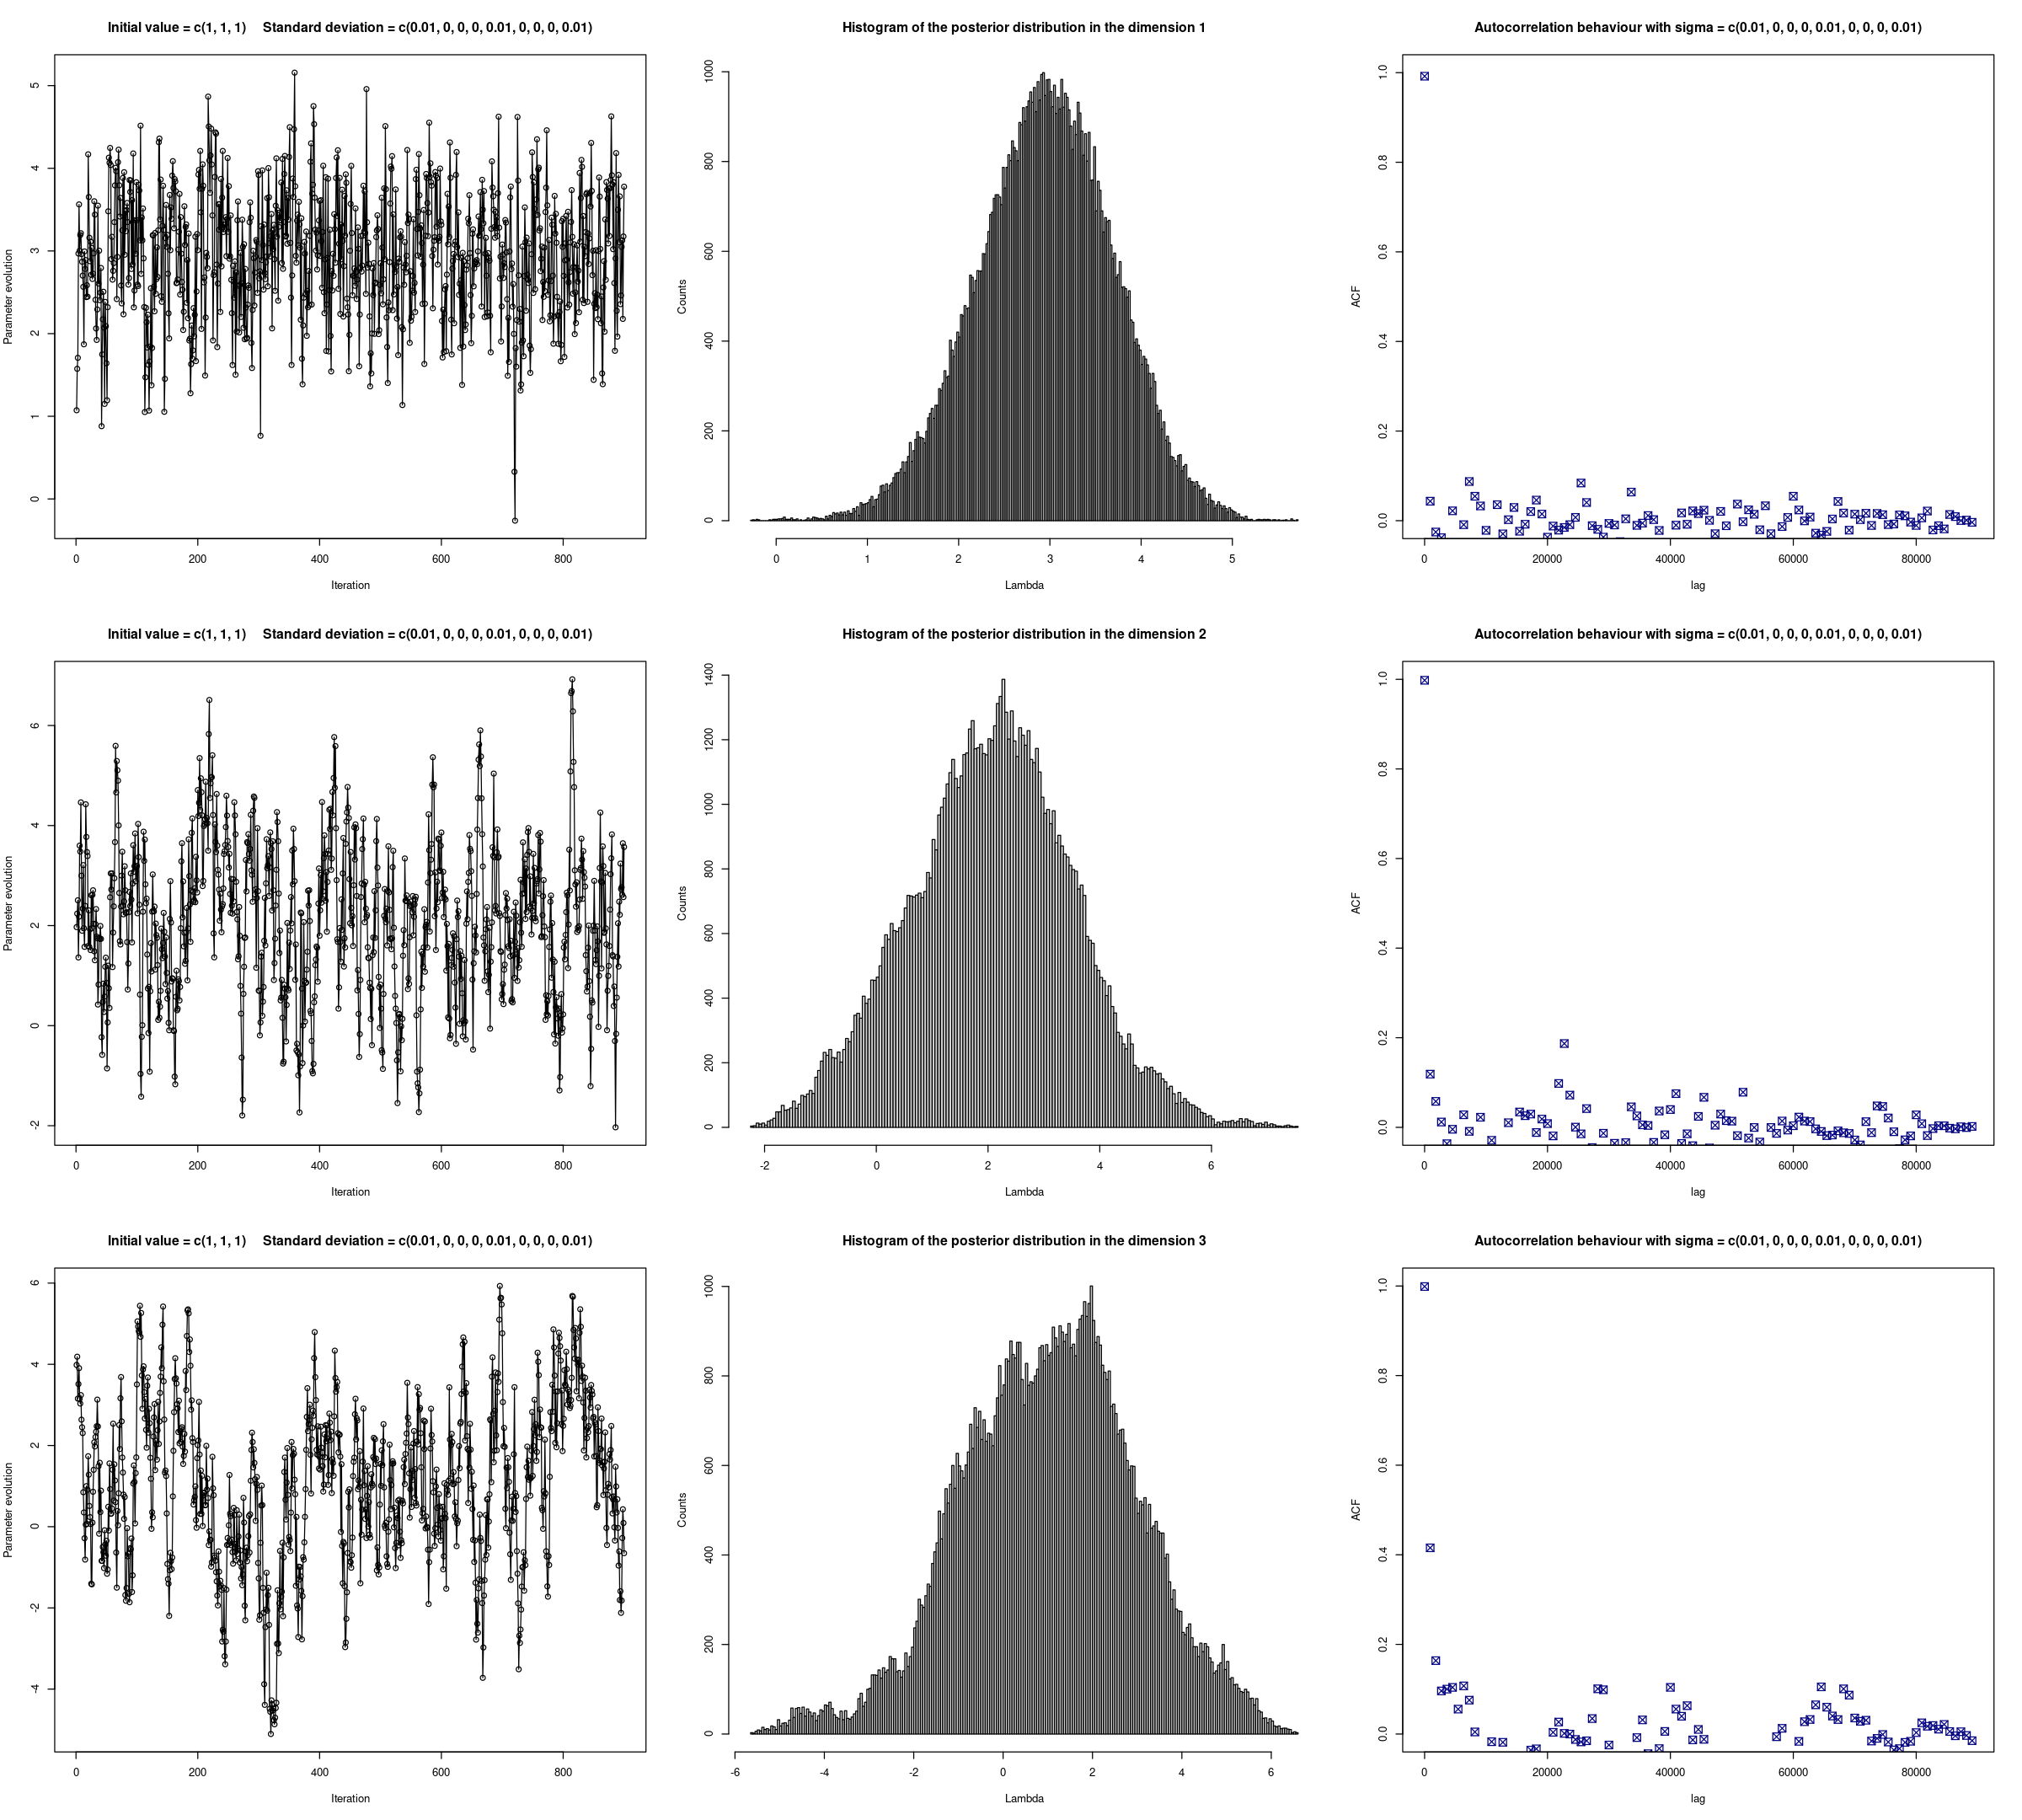

In [5]:
# MVTNORM 

# Evaluate then the MCMC
mcmc_g = random_steps_mvtnorm (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE)

# Selecting the sequence after the burn-in
mcmc_g = mcmc_g[burn_in:N, ]

# Plotting the results
show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  96.95758 %


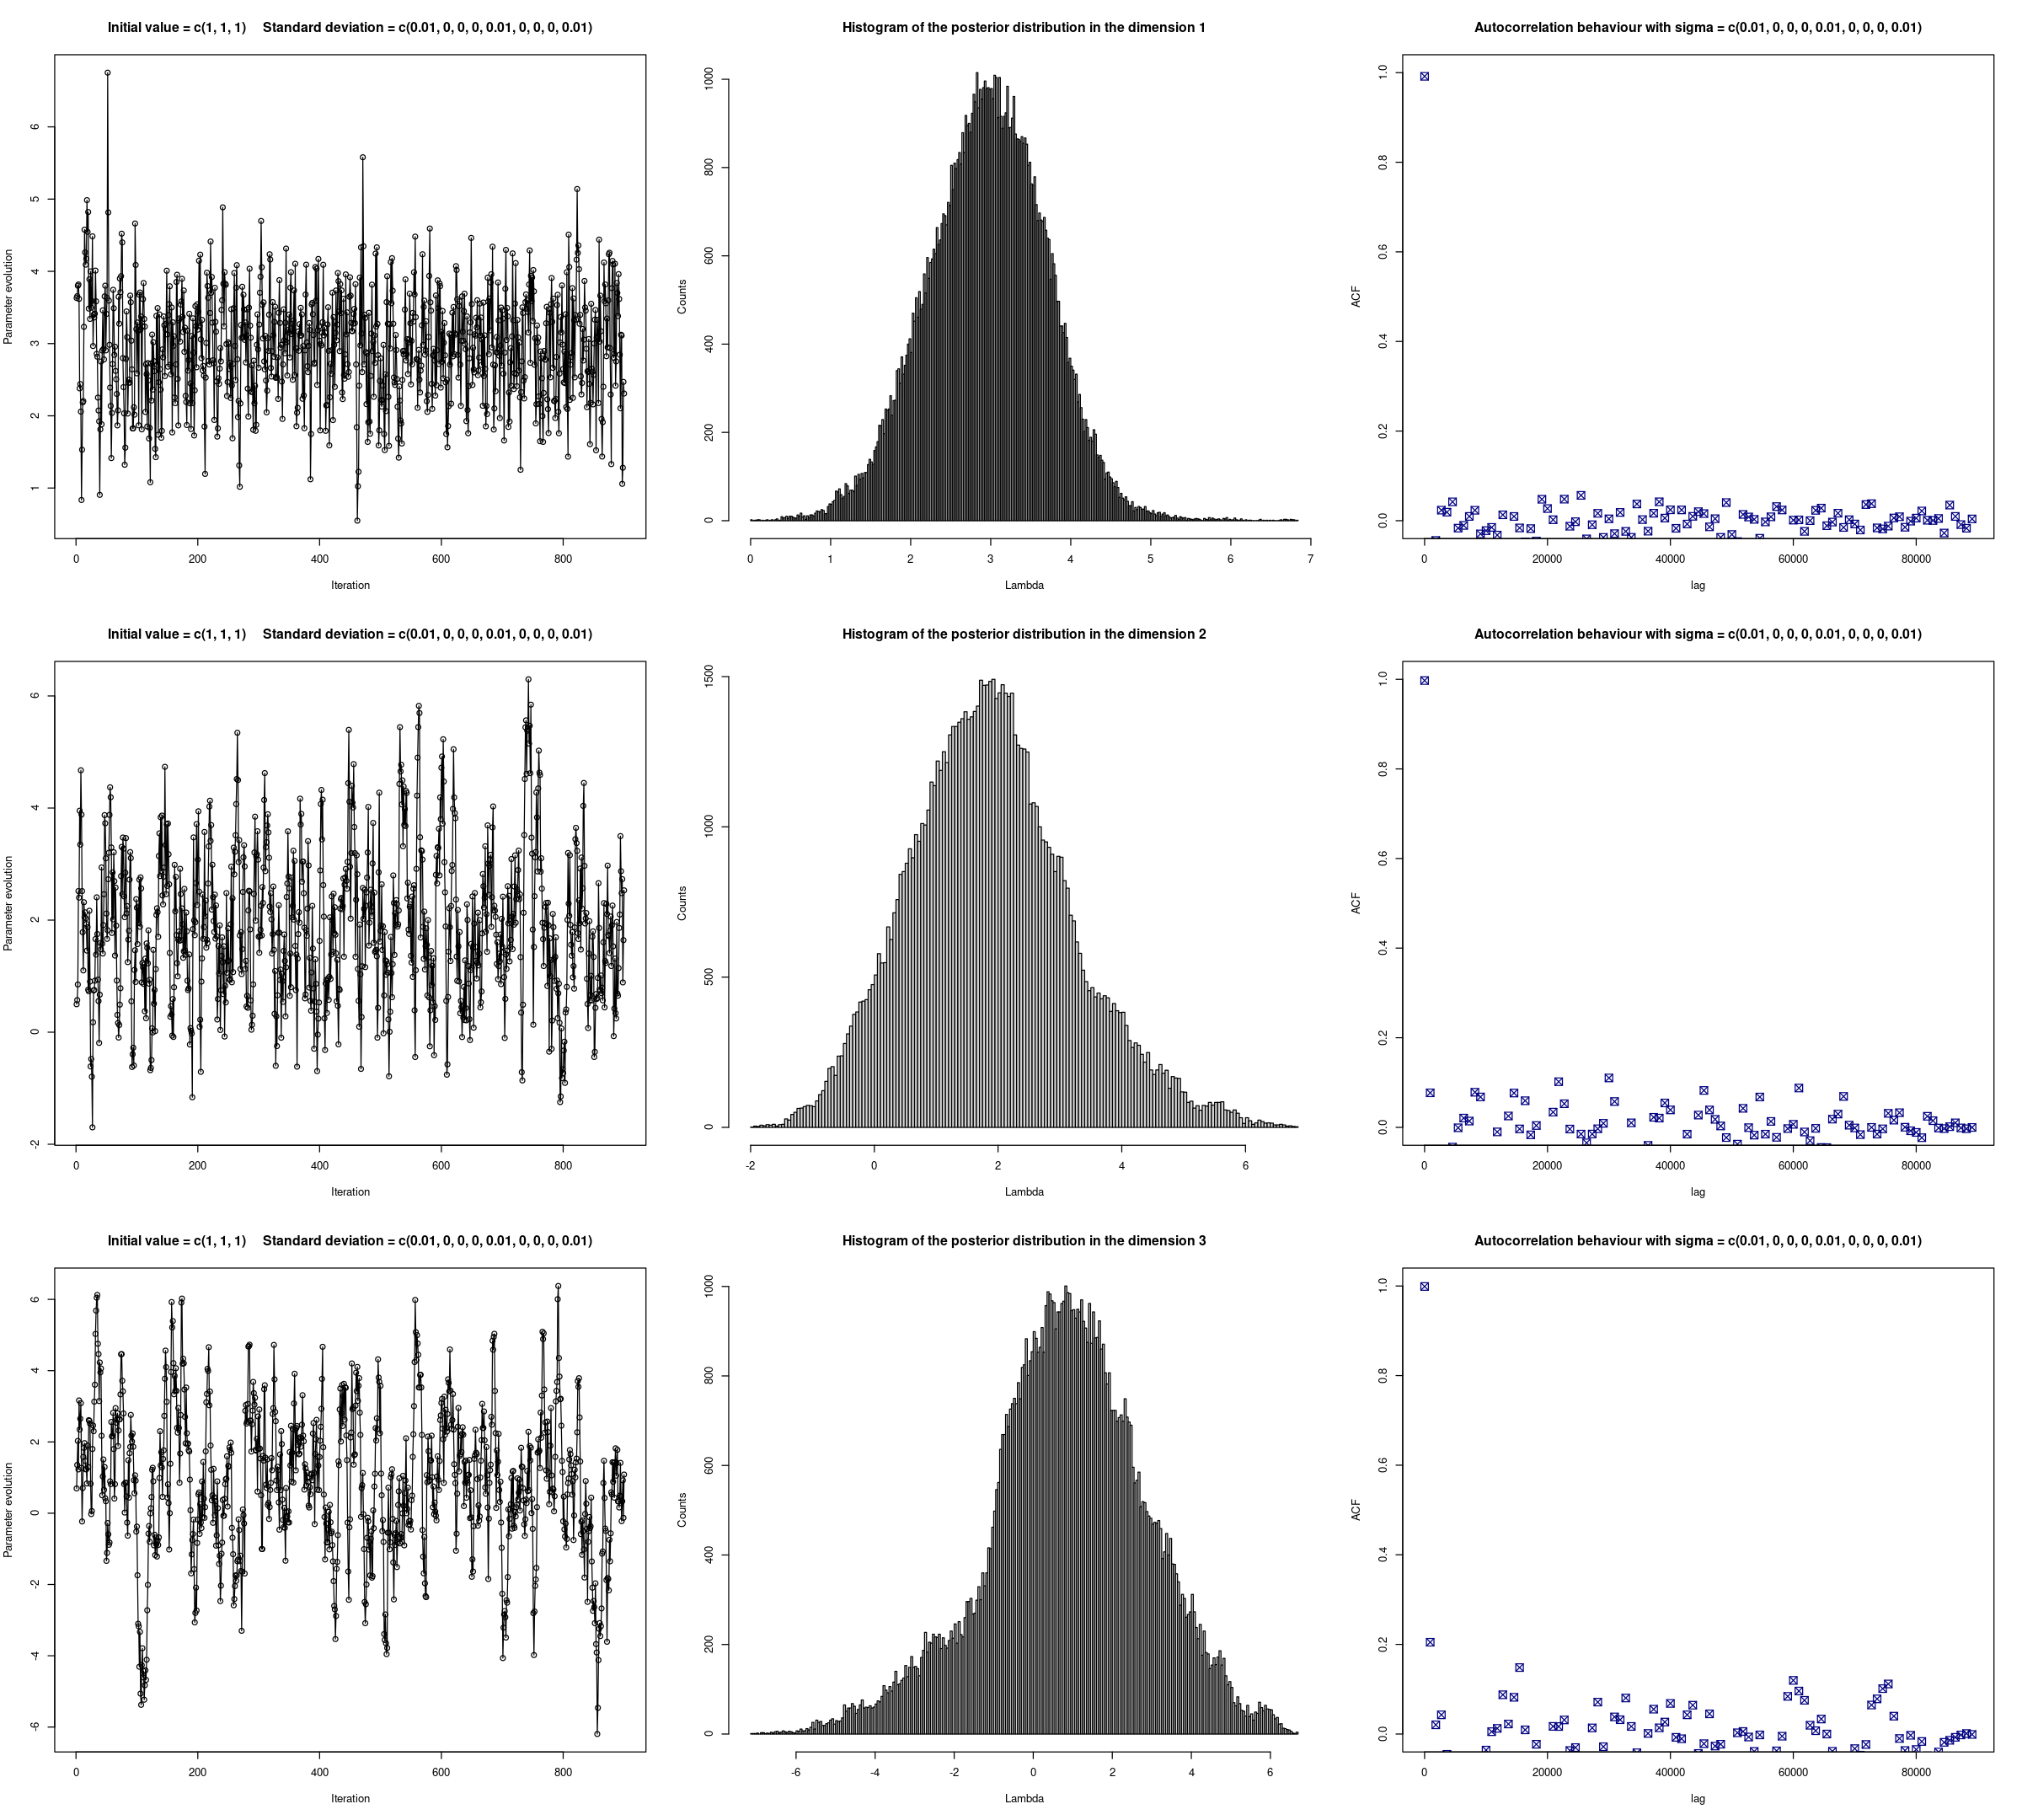

In [6]:
# MVTNORM GIBBS

mcmc_g = random_steps_mvtnorm_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

In [7]:
# # SIMPLE ADAPTIVE

# mcmc_g = random_steps_simple (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
#                                 gamma_function = gamma_series_exp, halved_step = burn_in)

# mcmc_g = mcmc_g[burn_in:N, ]

# show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

In [8]:
# # SIMPLE ADAPTIVE GIBBS

# mcmc_g = random_steps_simple_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
#                                 gamma_function = gamma_series_exp, halved_step = burn_in)

# mcmc_g = mcmc_g[burn_in:N, ]

# show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  17.24 %
Final mean =  3.010355 1.940537 1.077054 
Final covariance matrix = 
         [,1]      [,2]      [,3]
[1,] 32.34225 19.263158 12.541540
[2,] 19.26316 15.320143  7.675308
[3,] 12.54154  7.675308 12.754935


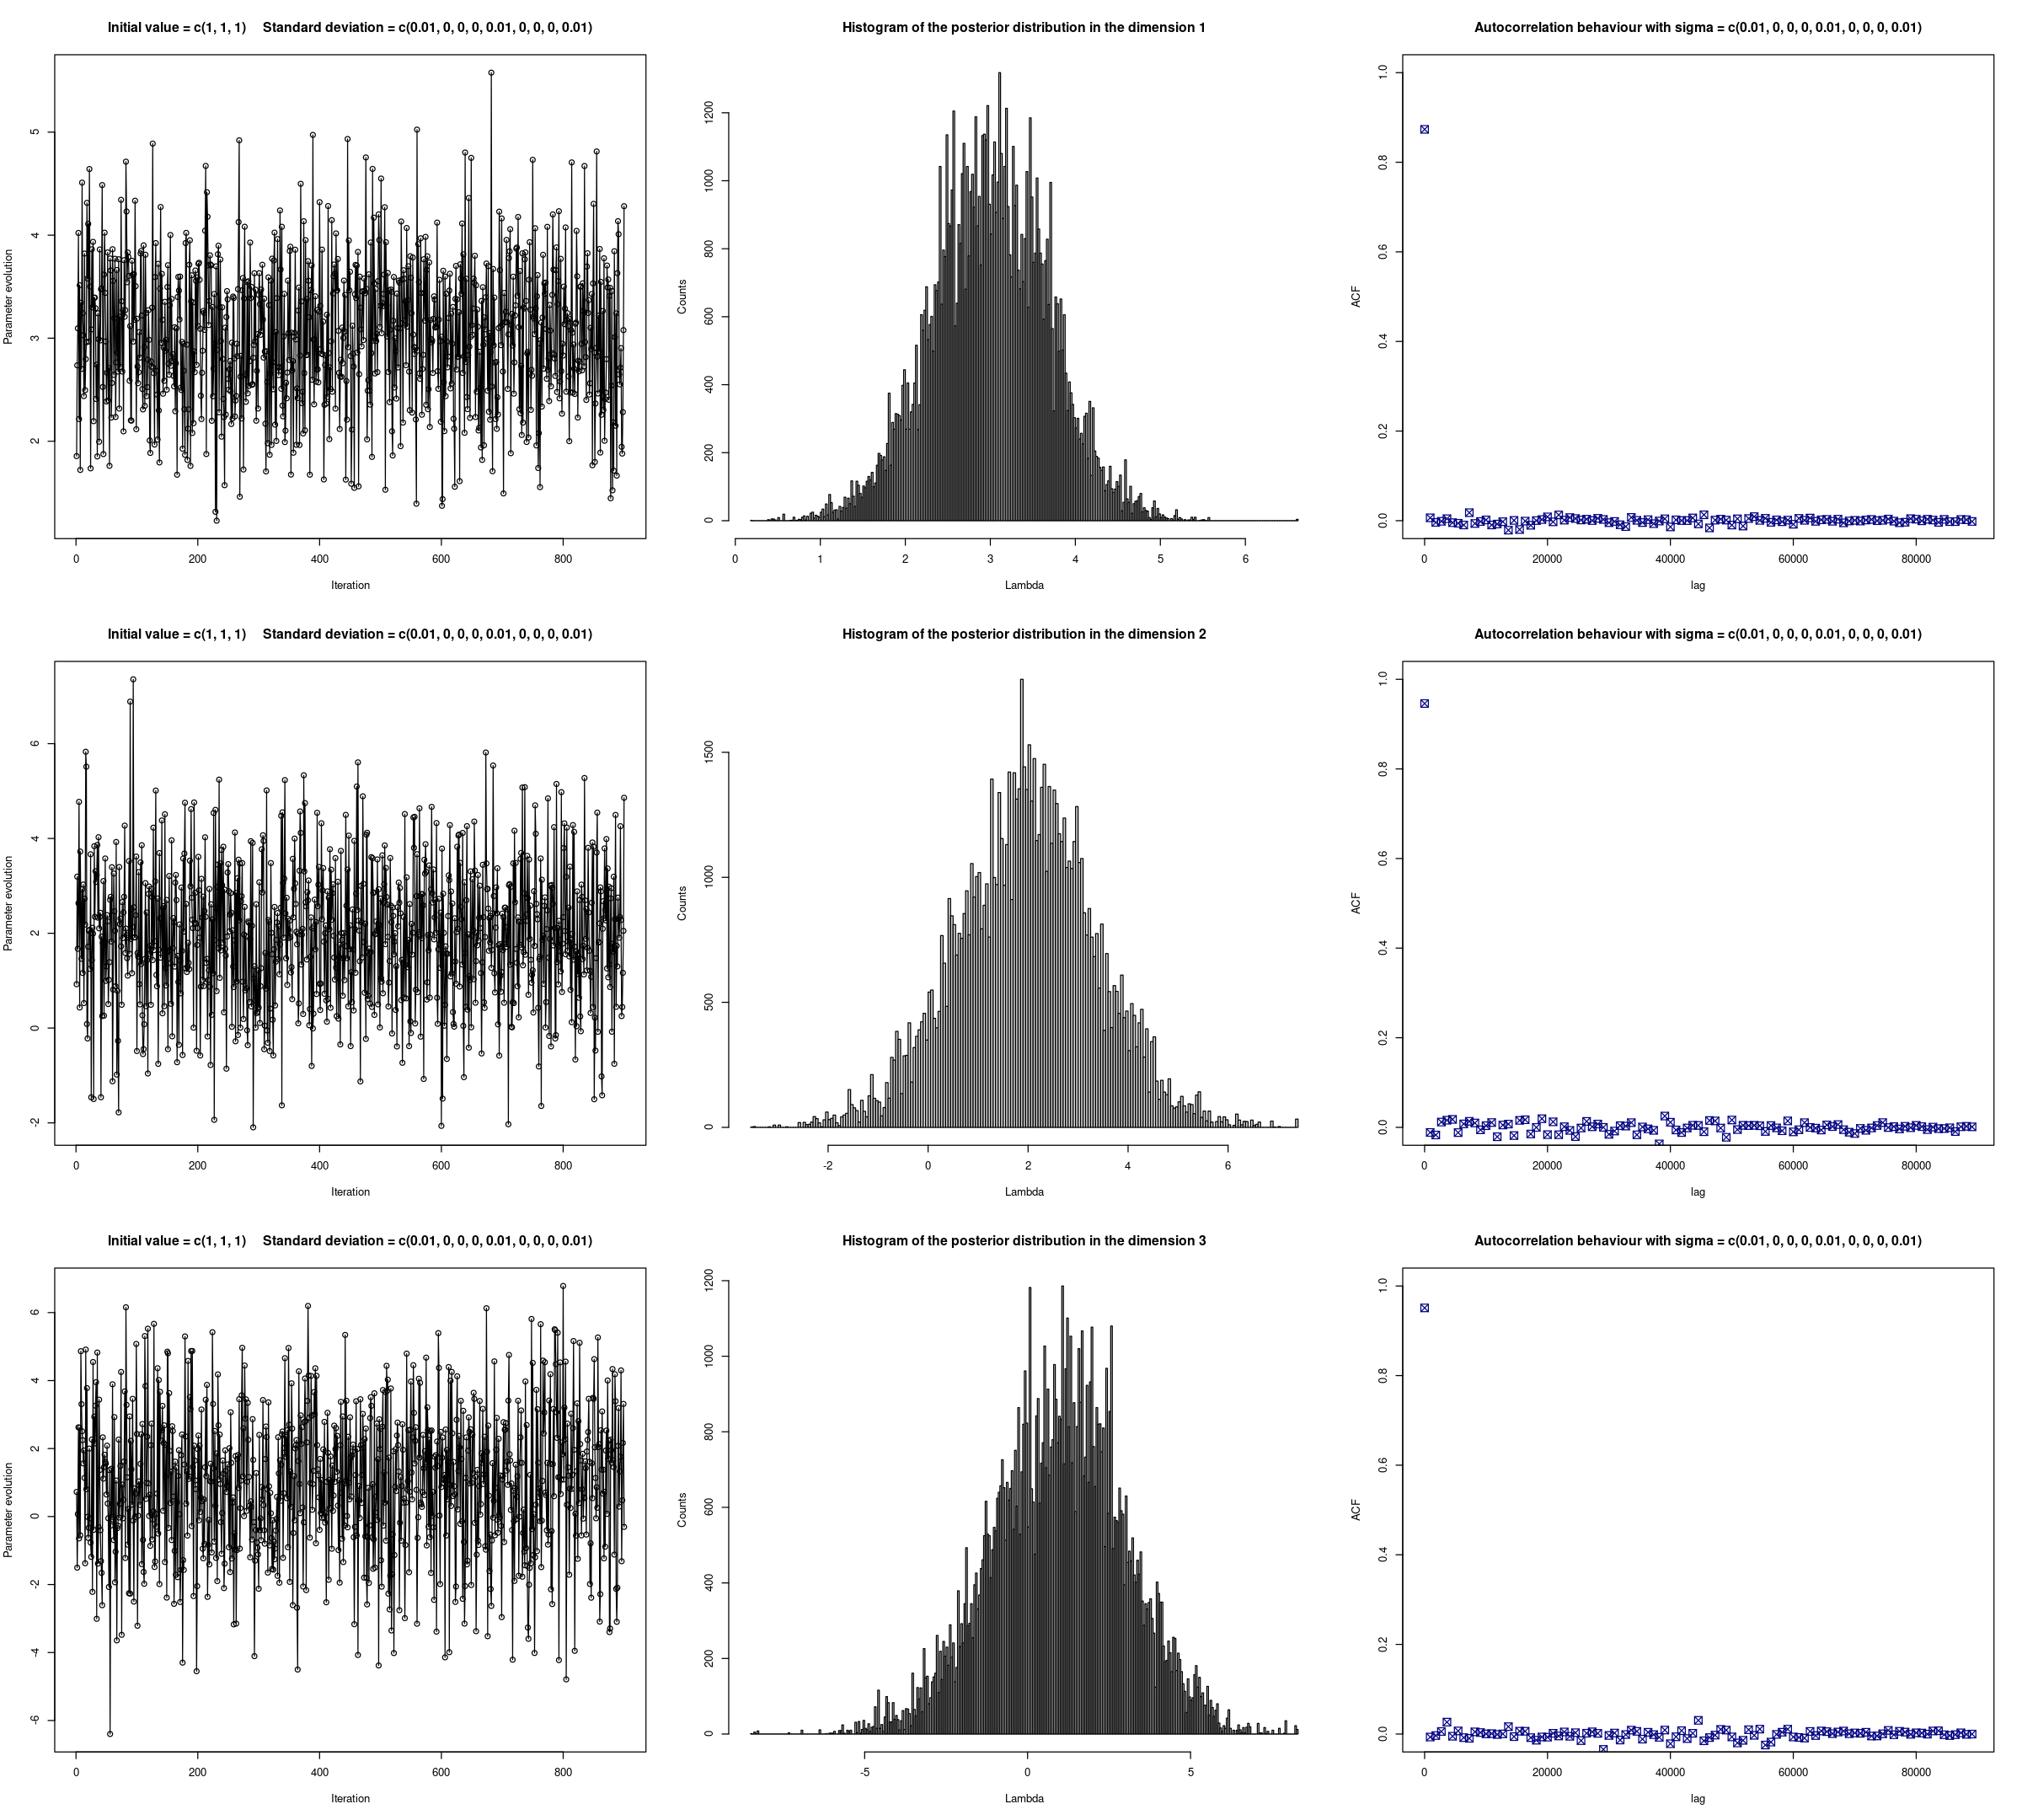

In [9]:
# HAARIO

mcmc_g = random_steps_haario (func_wanted = chosen_function, theta_init = init, n_samples = N_tot,
                                sigma = std, print_accept=TRUE, t_0 = burn_in, eps = epsilon)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  20.14424 %
Final mean =  2.994681 1.955302 0.9972612 
Final covariance matrix = 
         [,1]      [,2]      [,3]
[1,] 31.62458 19.572411 10.453507
[2,] 19.57241 15.692649  6.567577
[3,] 10.45351  6.567577 10.340022


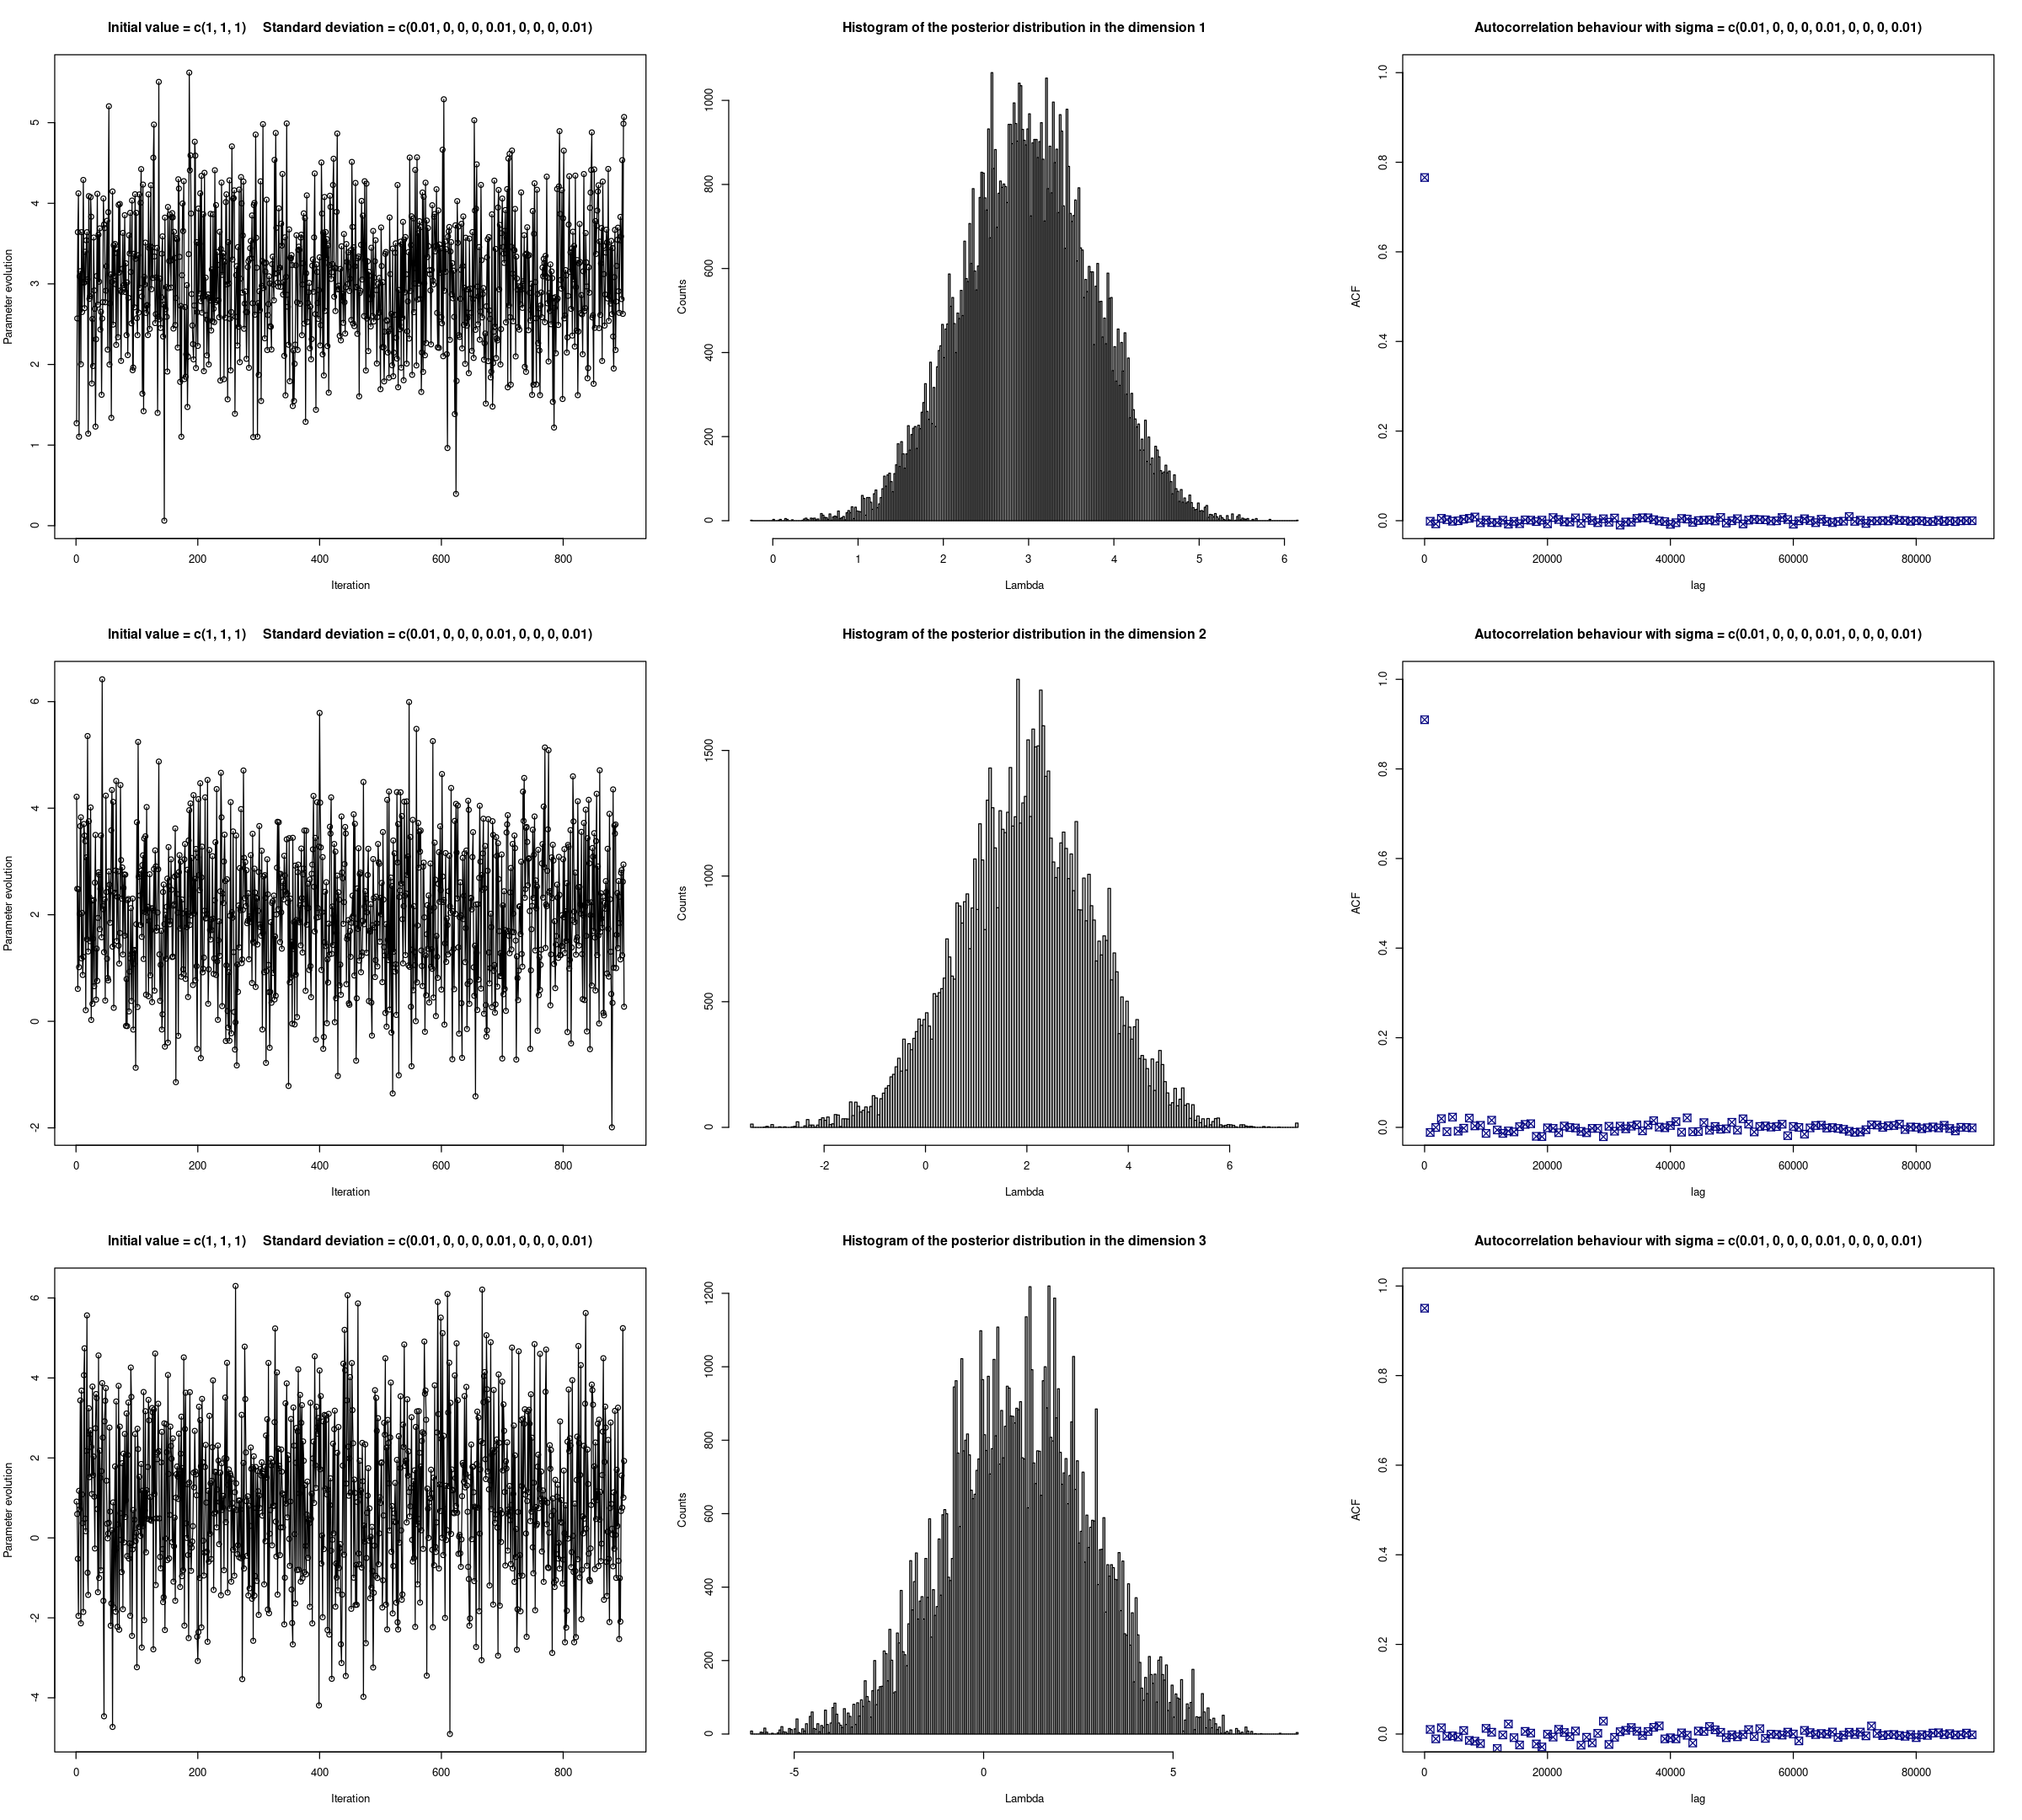

In [10]:
# HAARIO GIBBS

mcmc_g = random_steps_haario_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot,
                                    sigma = std, print_accept=TRUE, t_0 = burn_in, eps = epsilon)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  54.15909 %
Final mean =  3.004787 1.964824 0.8751818 
Final covariance matrix = 
             [,1]        [,2]         [,3]
[1,]  0.486335412 -0.02186879  0.003544823
[2,] -0.021868785  1.95180021 -0.040538494
[3,]  0.003544823 -0.04053849  4.466283202


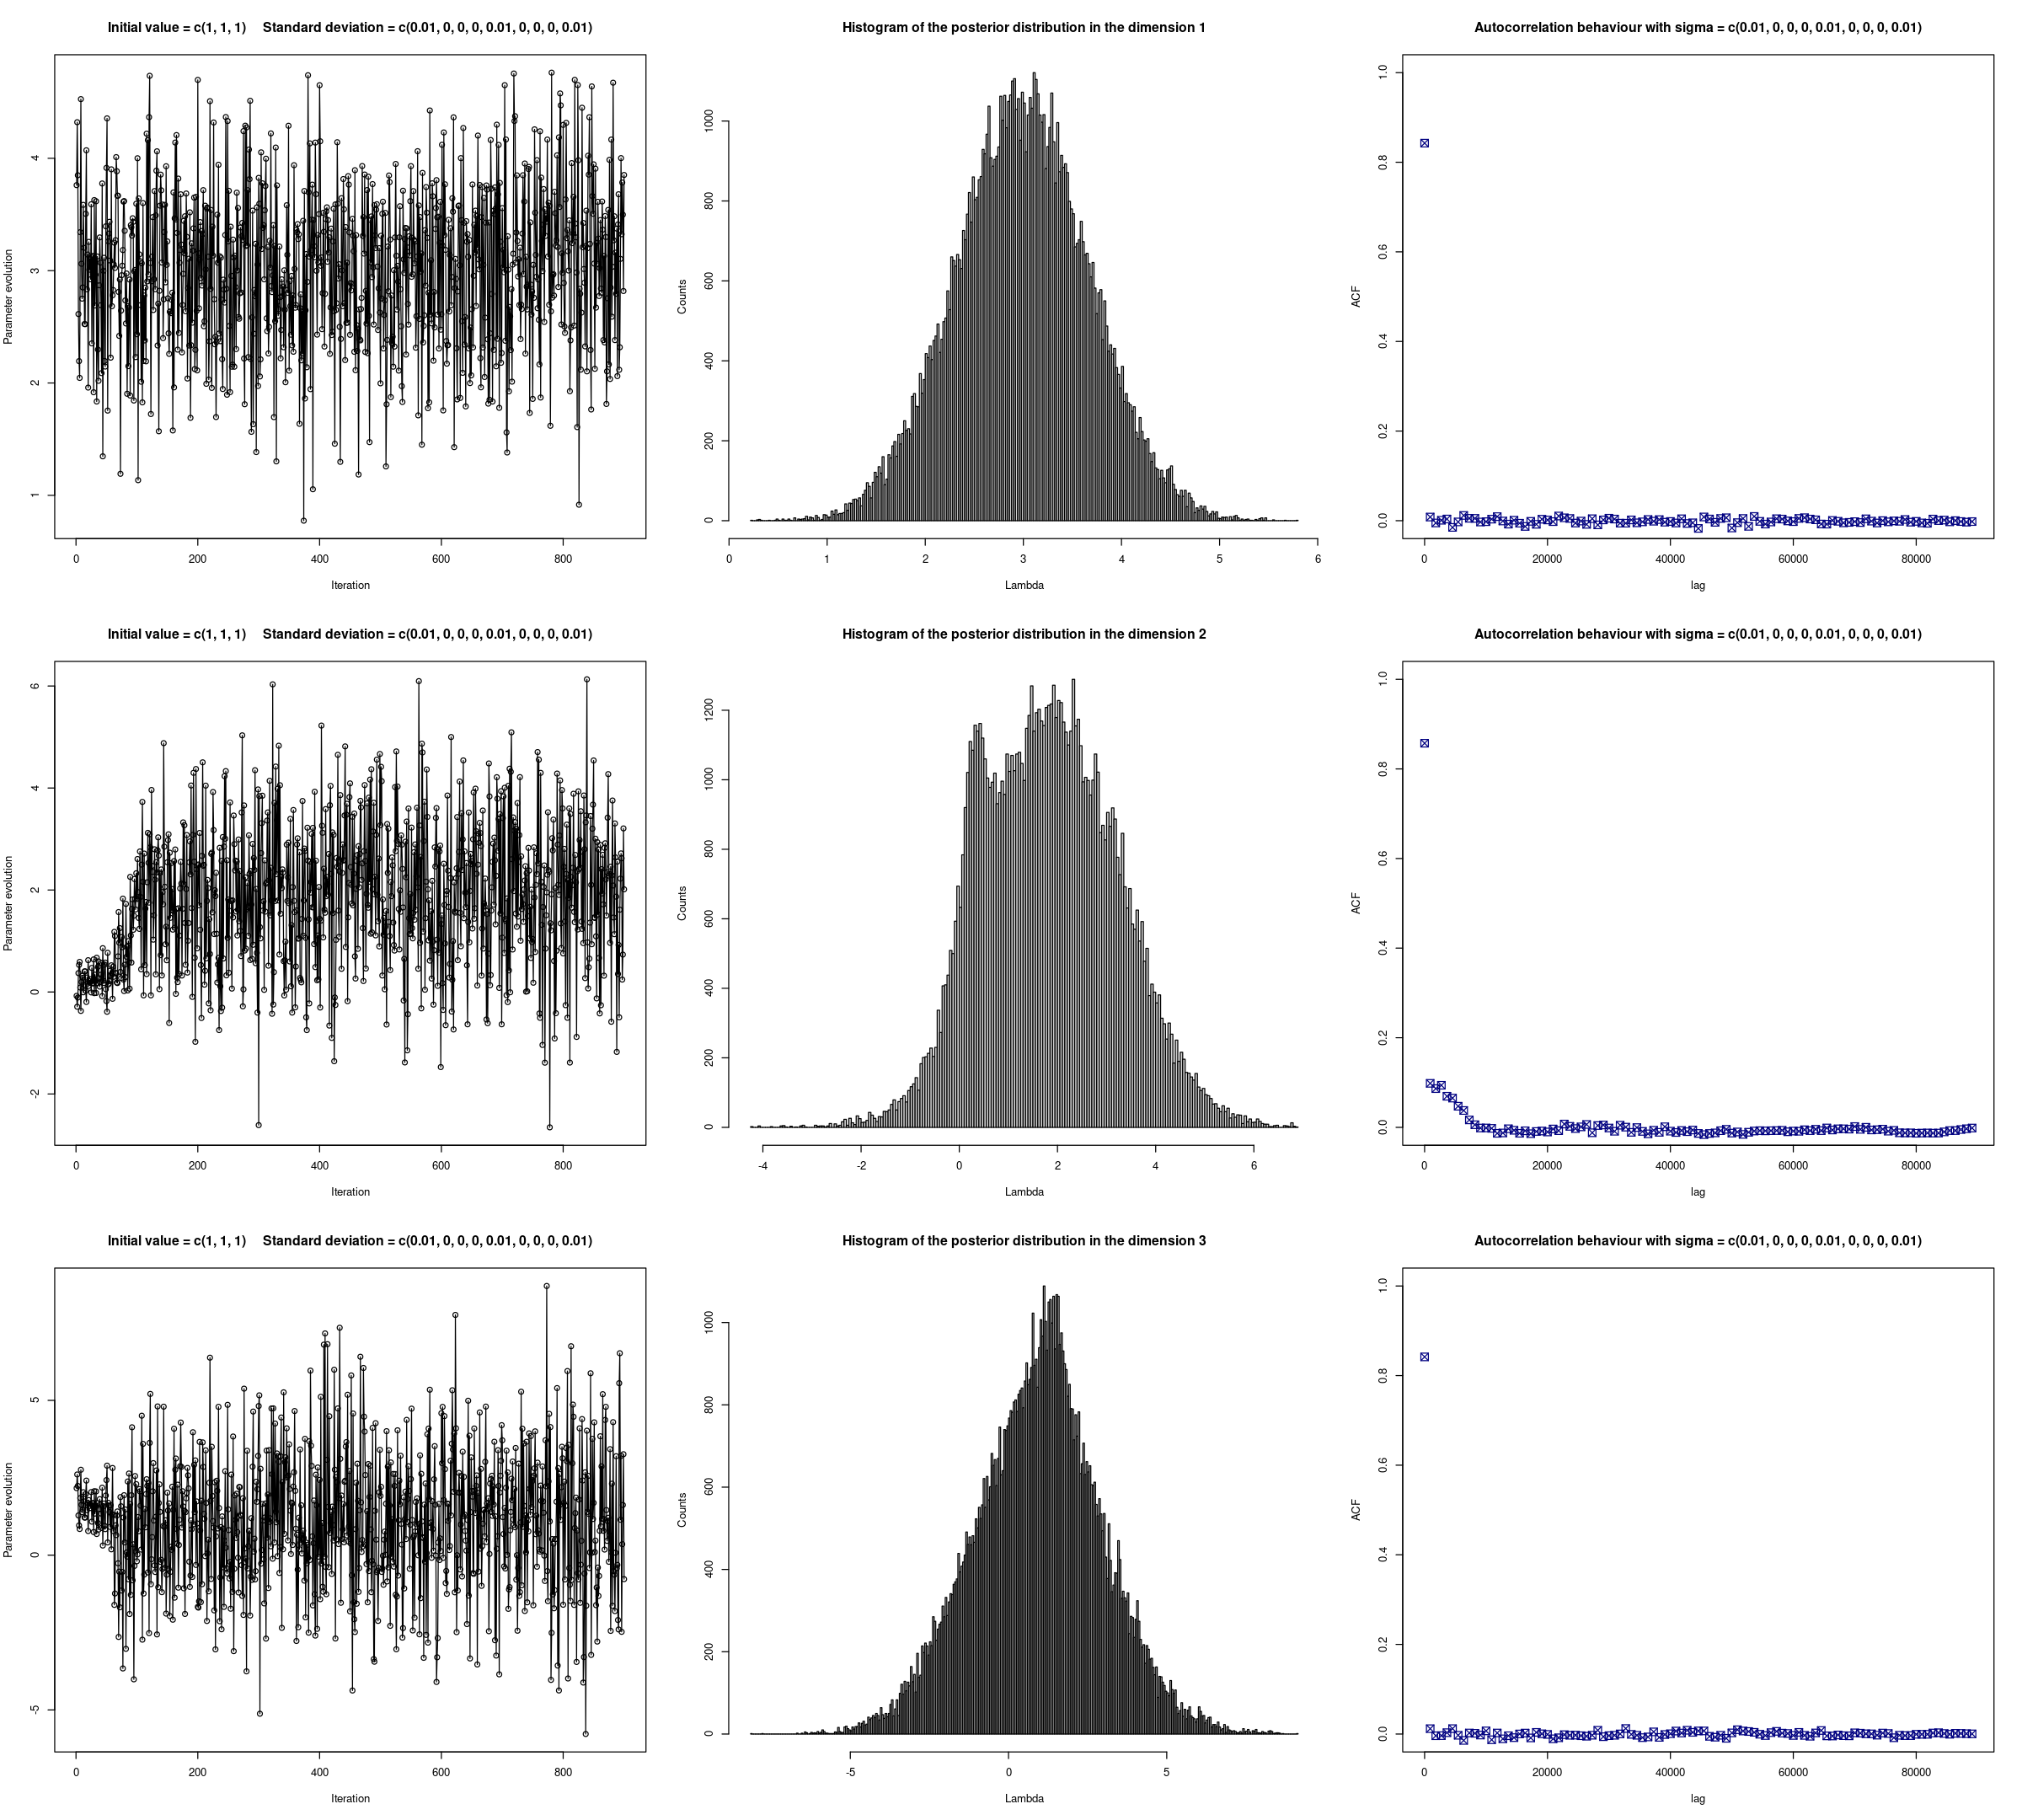

In [11]:
# RAO

mcmc_g = random_steps_AM_rao (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in/2)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  65.25364 %
Final mean =  2.993084 1.973052 1.033885 
Final covariance matrix = 
            [,1]        [,2]        [,3]
[1,] 0.592432606 0.002368312 0.003210283
[2,] 0.002368312 1.766800770 0.042267652
[3,] 0.003210283 0.042267652 4.068728144


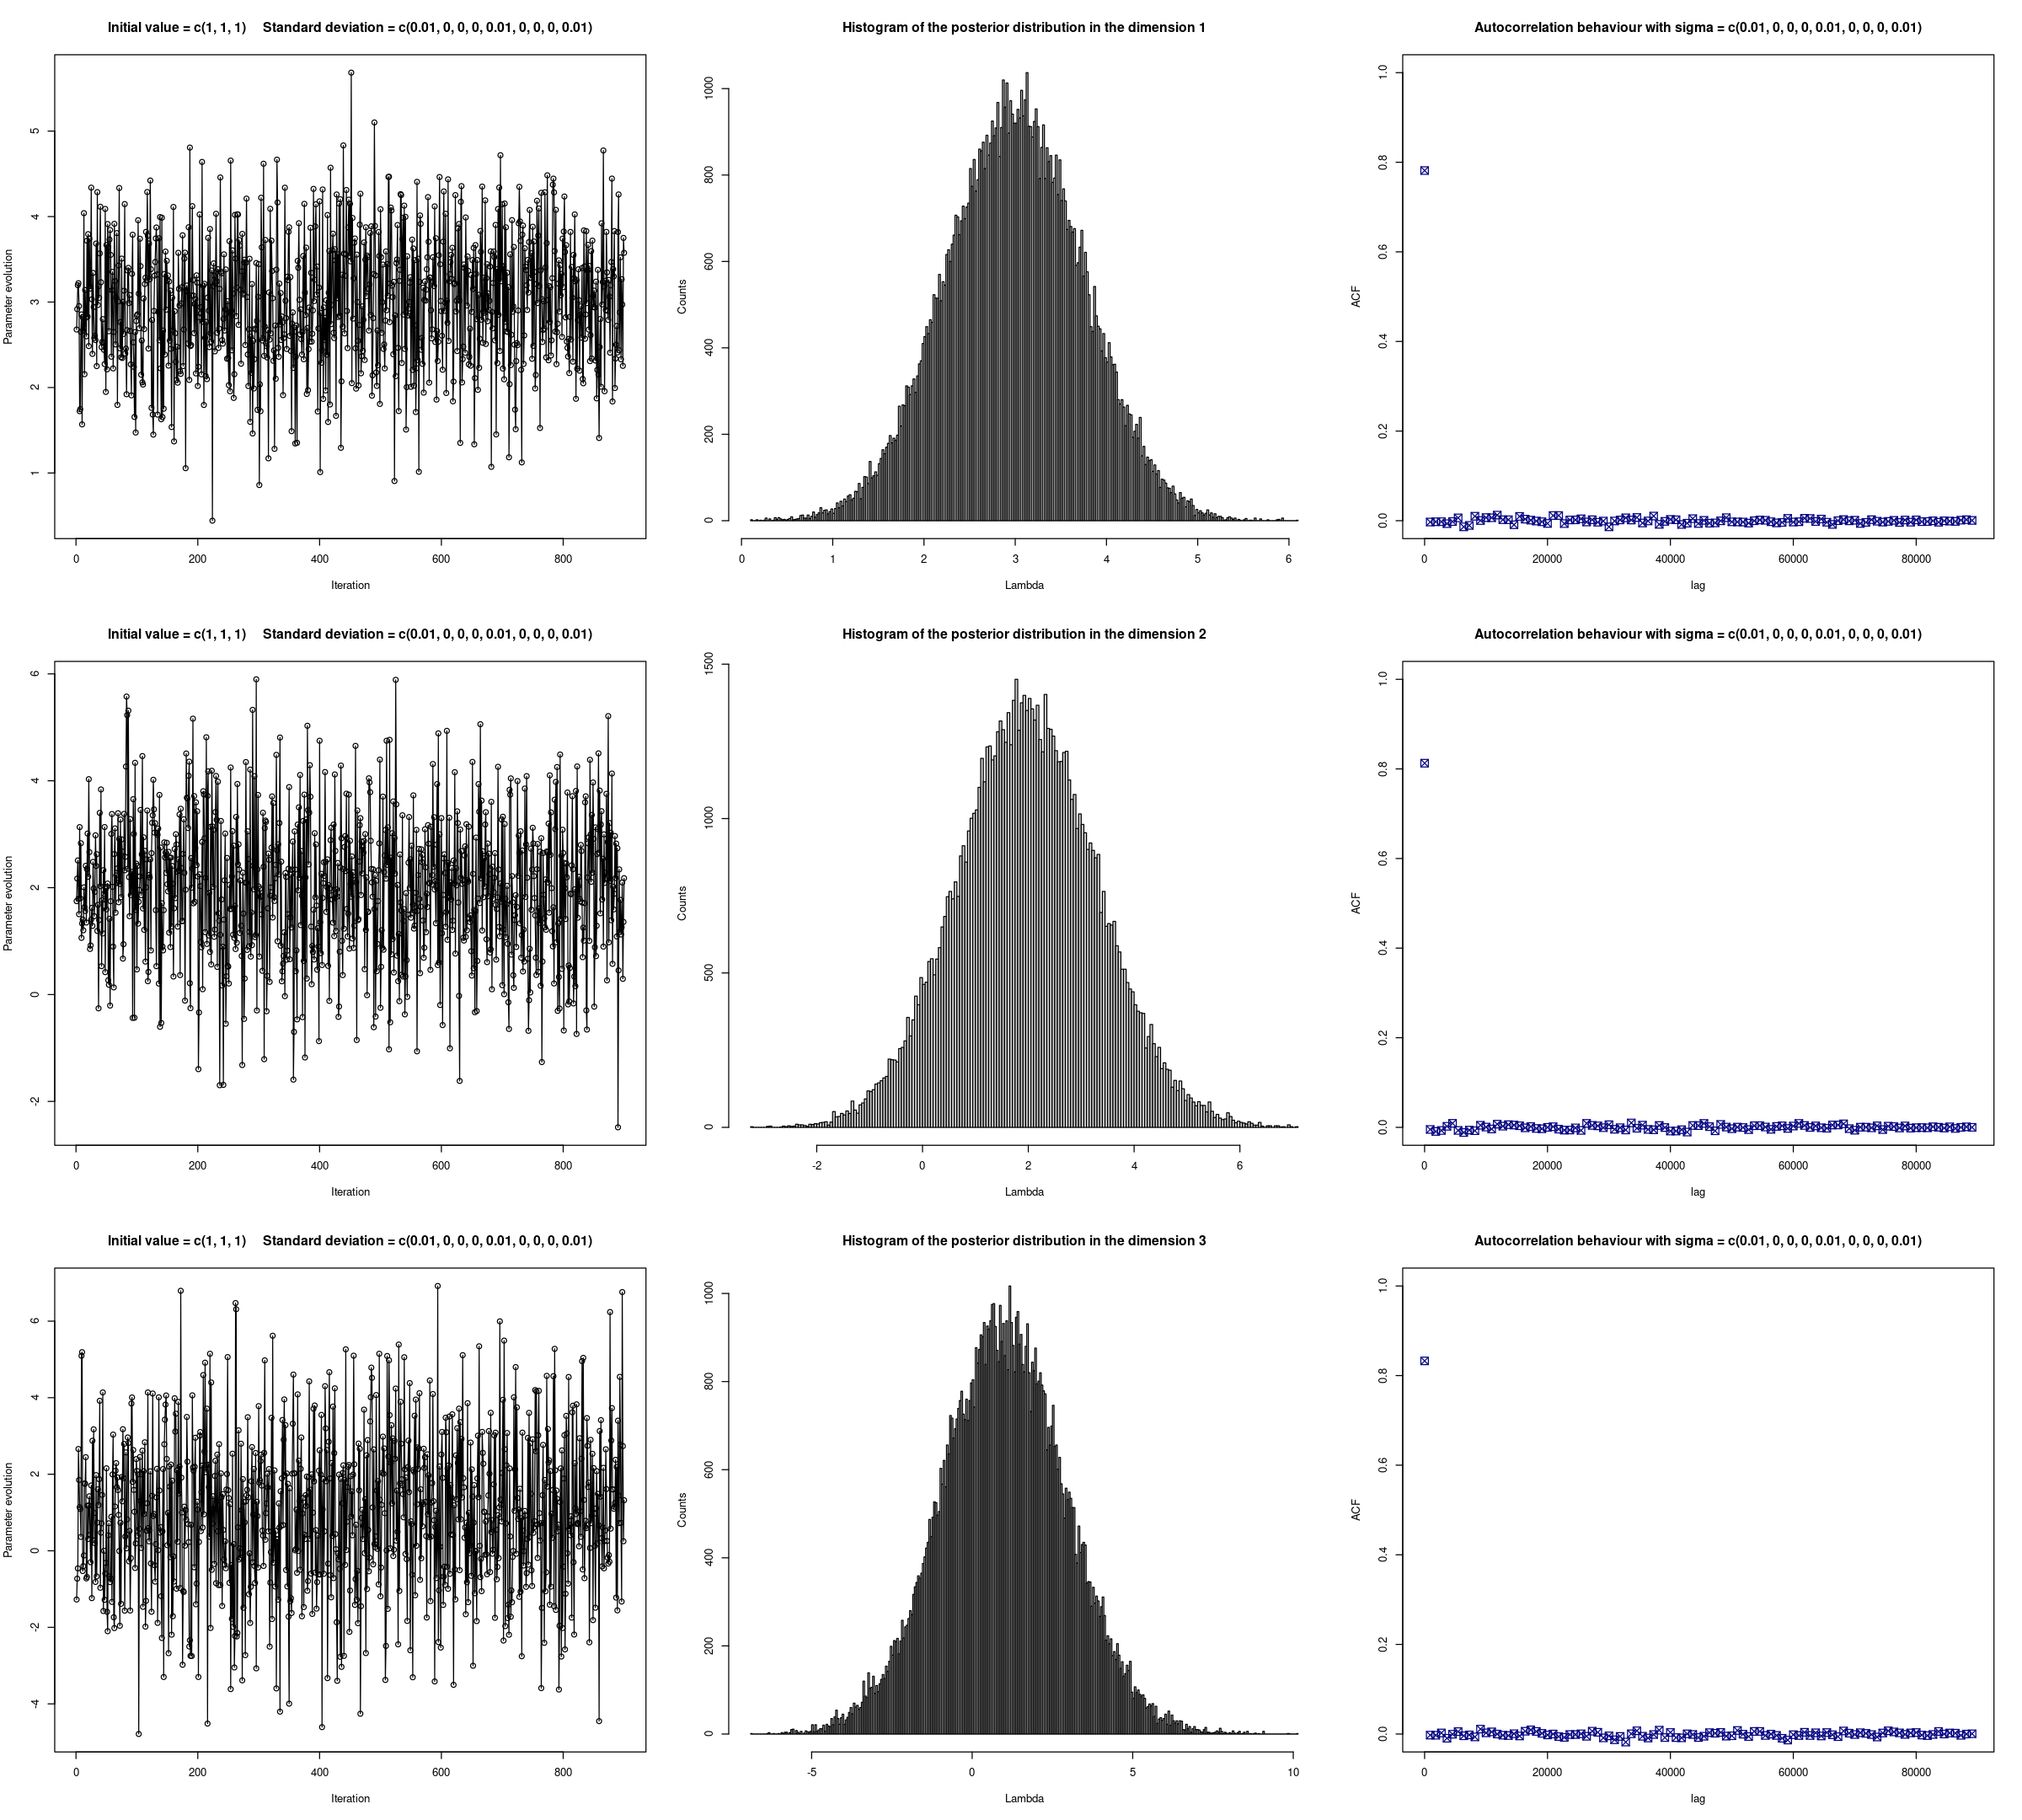

In [12]:
# RAO GIBBS

mcmc_g = random_steps_AM_rao_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in/2)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  99.10364 %
Final mean =  3.568016 -0.778375 0.499471 
Final lambda =  -3.376069 
Final covariance matrix = 
               [,1]           [,2]           [,3]
[1,]  4.940656e-324 -4.940656e-324  4.940656e-324
[2,] -4.940656e-324  4.940656e-324 -4.940656e-324
[3,]  4.940656e-324 -4.940656e-324  4.940656e-324


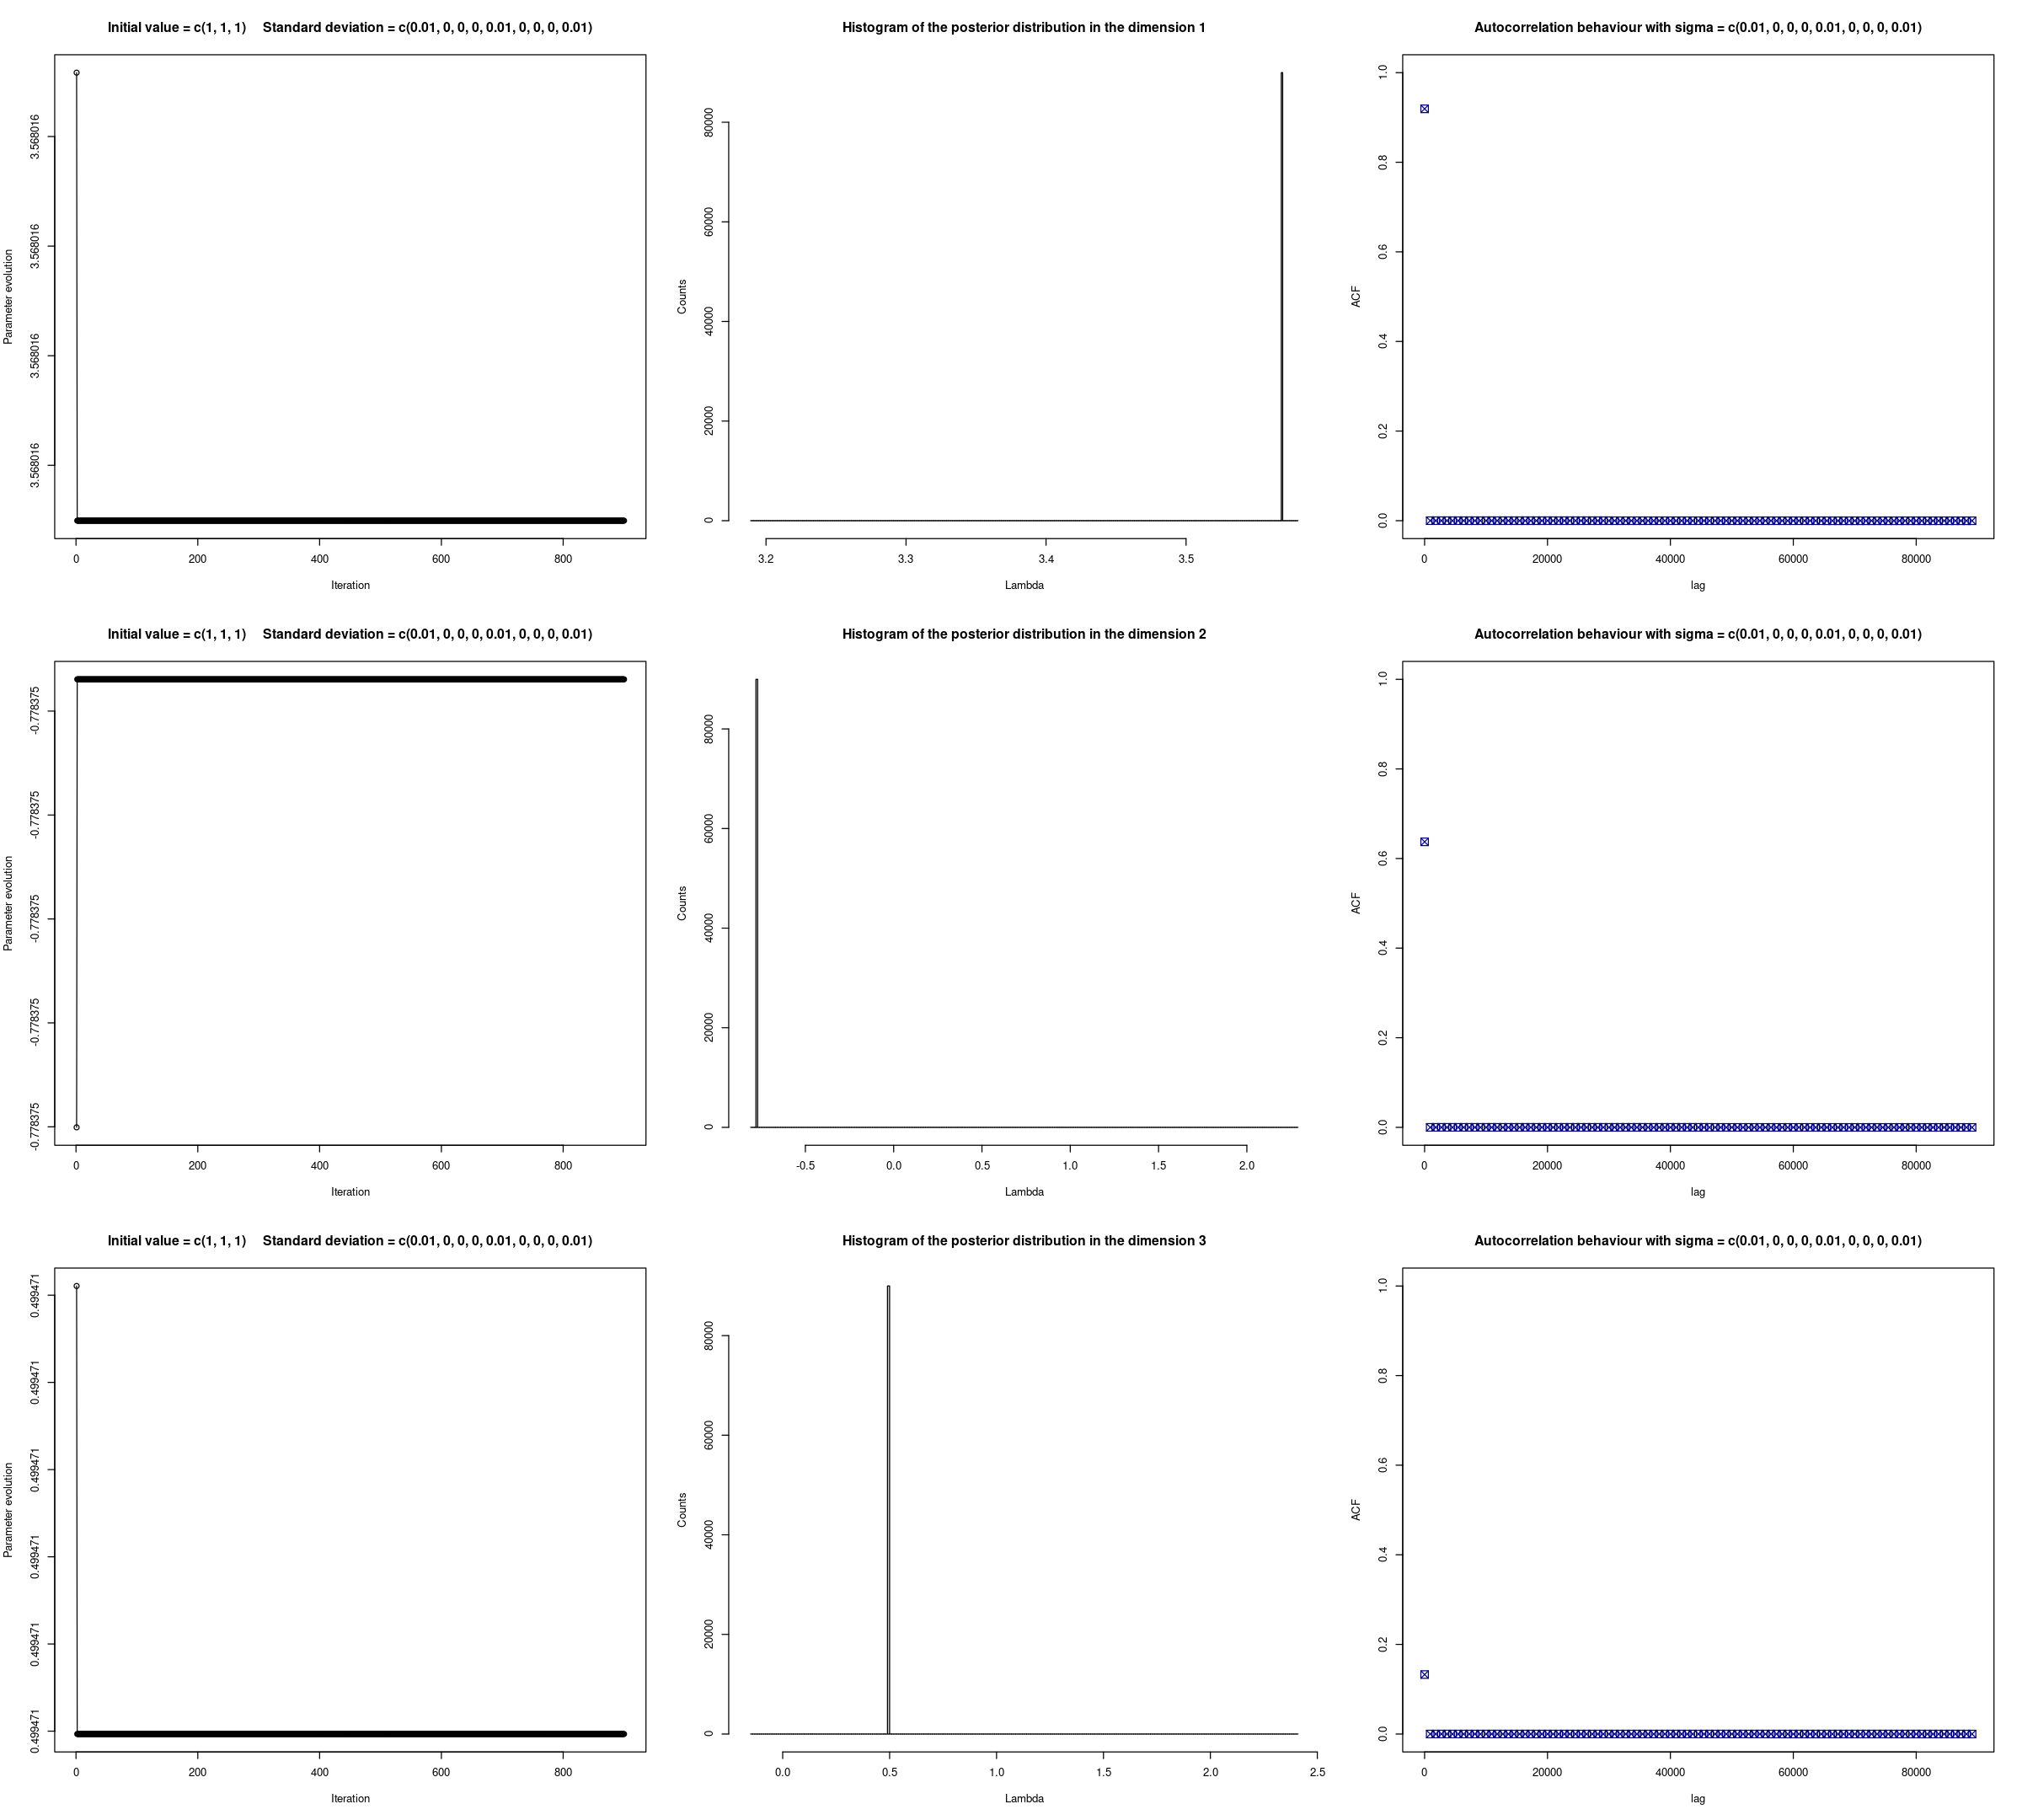

In [13]:
# GLOBAL

mcmc_g = random_steps_global (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  95.95394 %
Final mean =  2.936255 2.010539 3.517417 
Final lambda =  -3.187529 
Final covariance matrix = 
               [,1]           [,2]           [,3]
[1,]   6.372206e-01  -1.173992e-01 -4.940656e-324
[2,]  -1.173992e-01   1.516868e+00 -4.940656e-324
[3,] -4.940656e-324 -4.940656e-324  4.940656e-324


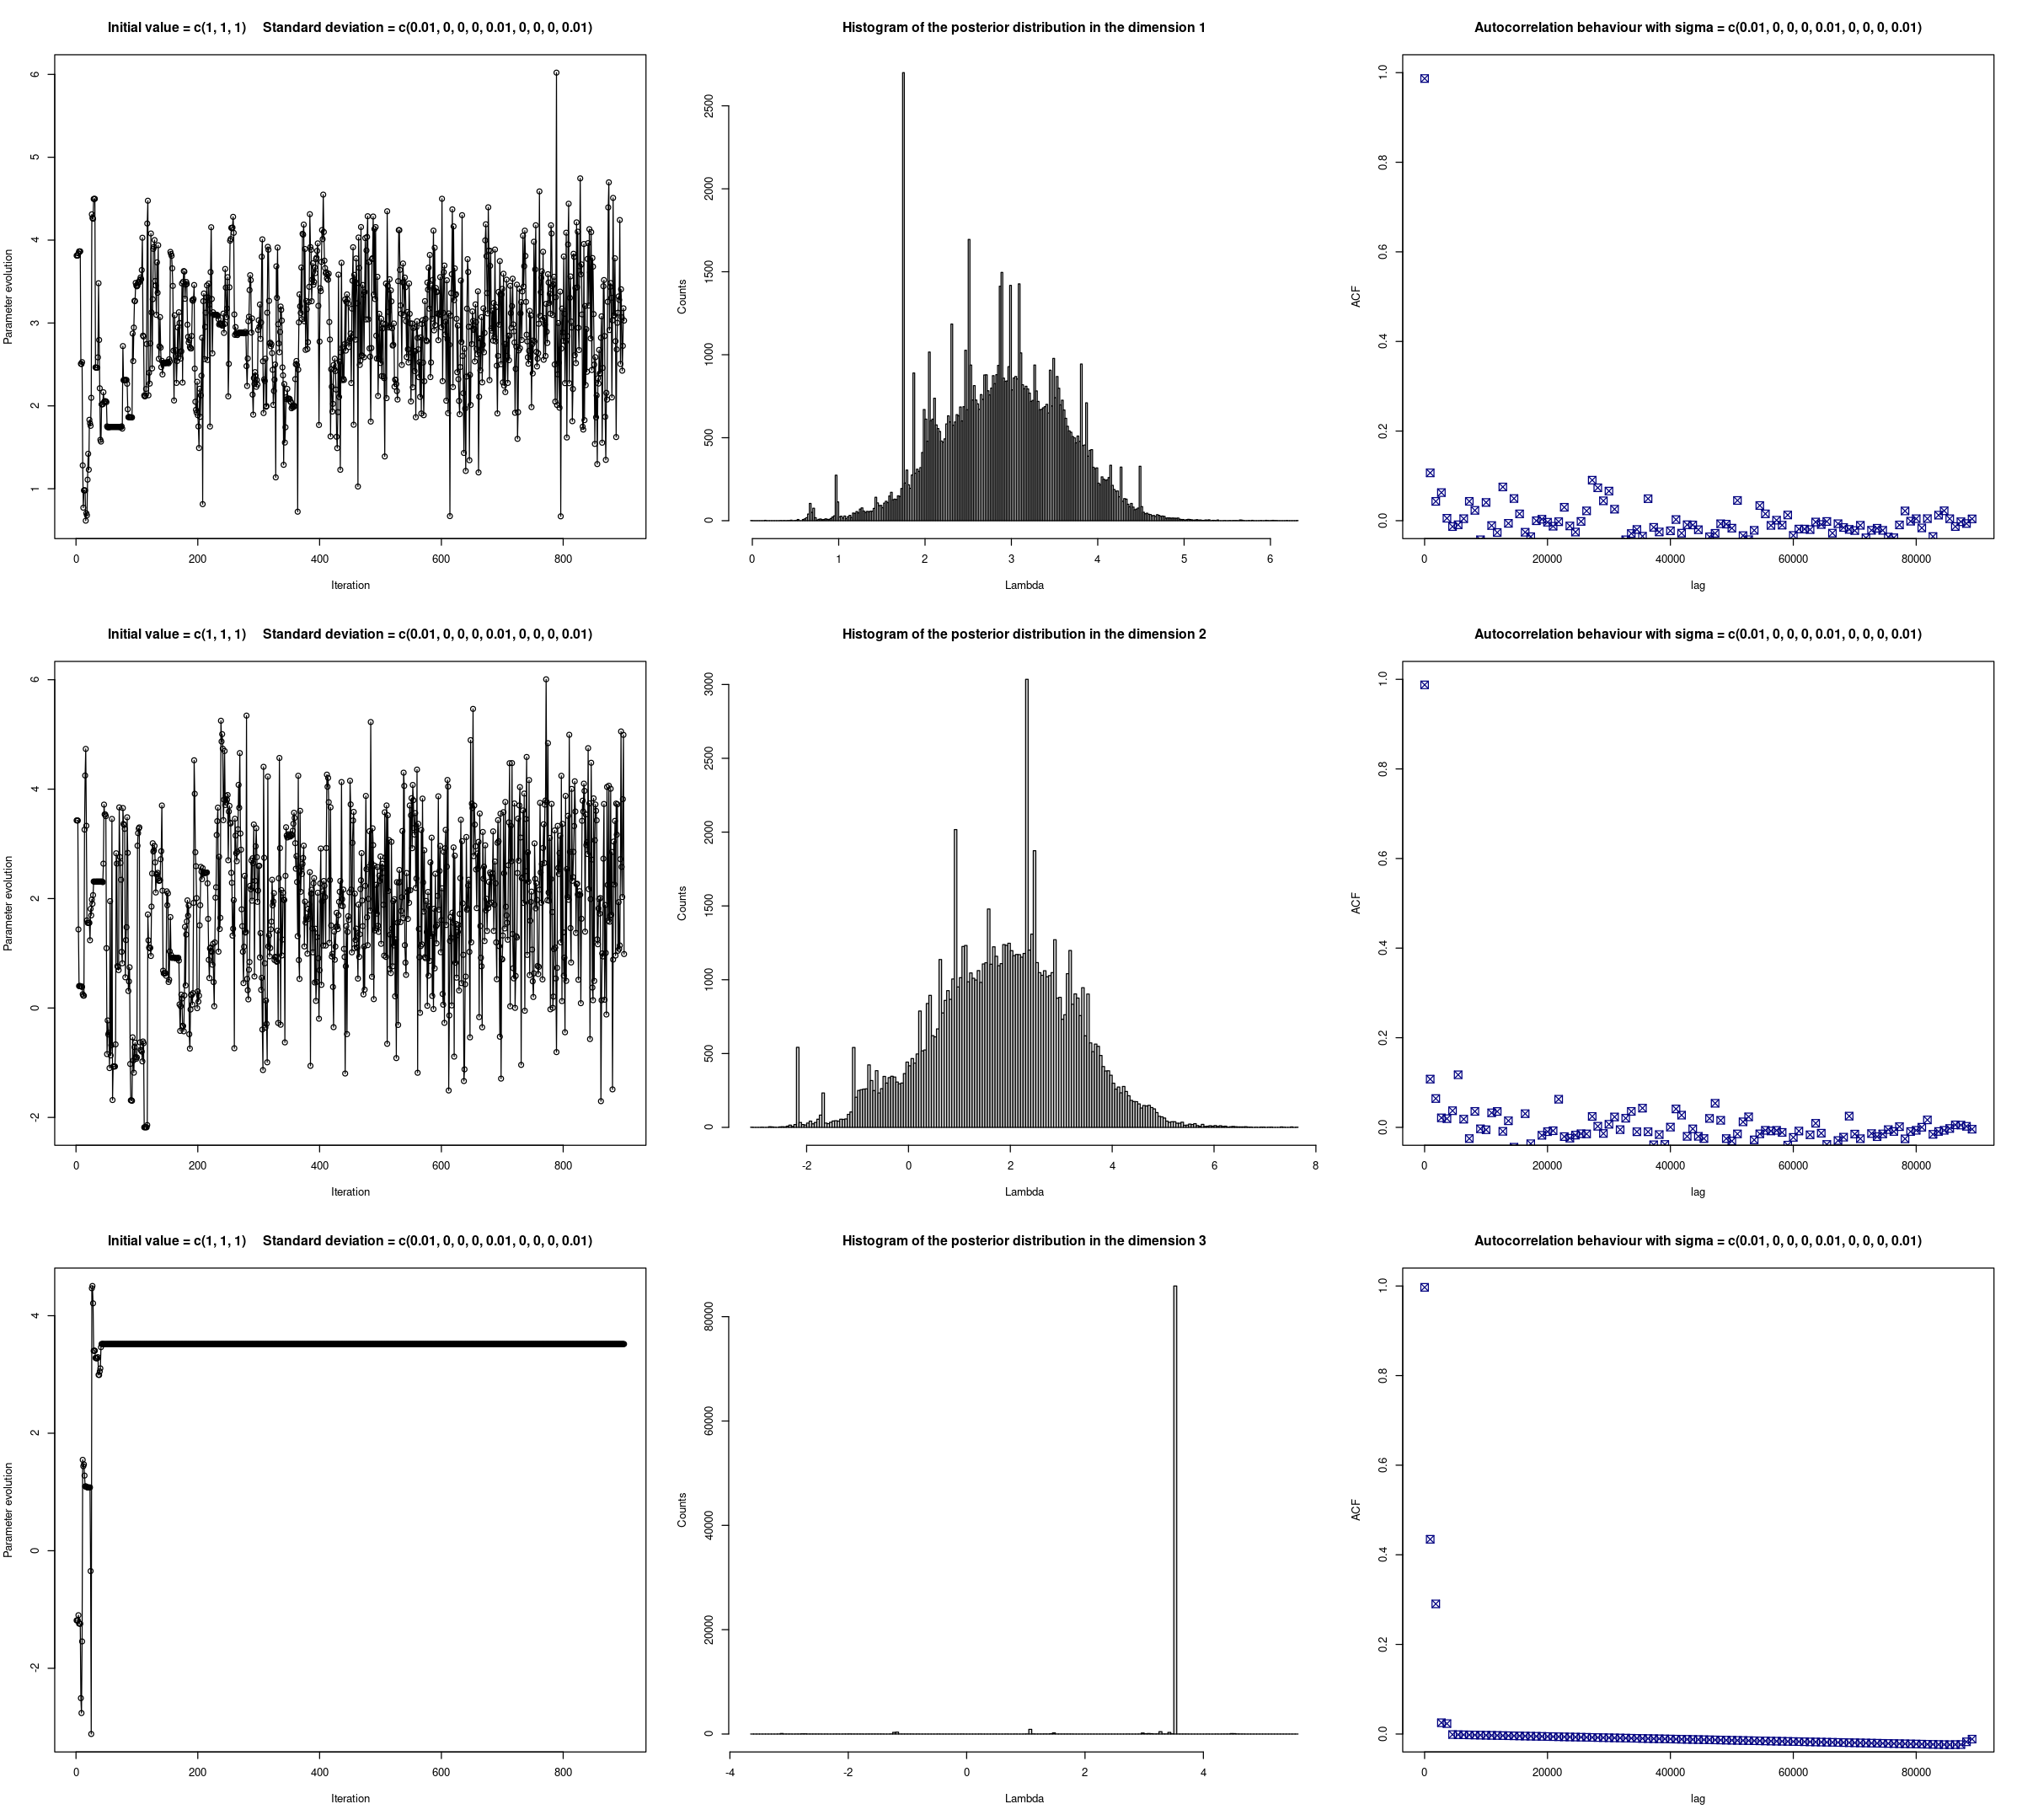

In [14]:
# GLOBAL GIBBS

mcmc_g = random_steps_global_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)